In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# visualization librarires

Matplotlib

Pandas

Seaborn

ggplot

Bokeh

Plot.ly

# First Glance

In [4]:
import seaborn as sns


In [13]:
# Story of Dataset ?
# Structure of Dataset ?


In [6]:
df_copy=df.copy()

In [8]:
# General Info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# convert object to categoric one

df.Sex=pd.Categorical(df.Sex)
df.Cabin=pd.Categorical(df.Cabin)
df.Embarked=pd.Categorical(df.Embarked)



In [12]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

# Describe Dataset - Numerical Variables

In [14]:
df.shape

(891, 12)

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.describe().T  # ignore missing values and categorical variables

# Survived --> actually target variable, not numeric
# PassengerId --> actually dobject variable, not used as numeric
# Pclass --> actually ordinal variable, not used as numeric


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [26]:
df.Survived=pd.Categorical(df.Survived)
df.PassengerId=pd.Categorical(df.PassengerId)
df.Pclass=pd.Categorical(df.Pclass)

In [27]:
df.dtypes

PassengerId    category
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Describe Dataset -- Categorical Variables

In [38]:
# select categorical variables

cat_df= df.select_dtypes(include=["category"])

cat_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked
0,1,0,3,male,S
1,2,1,1,female,C
2,3,1,3,female,S
3,4,1,1,female,S
4,5,0,3,male,S


In [41]:
# class info of categorical variables

print(cat_df.Pclass.unique())

print(cat_df.Embarked.unique())

print(cat_df.Sex.unique())

[3, 1, 2]
Categories (3, int64): [3, 1, 2]
[S, C, Q, NaN]
Categories (3, object): [S, C, Q]
[male, female]
Categories (2, object): [male, female]


In [45]:
# class info more detail -- class number

print(cat_df.Embarked.value_counts().count())

print(cat_df.Sex.value_counts().count())

print(cat_df.Pclass.value_counts().count())


3
2
3


In [46]:
# class info more detail -- class frequency

print(cat_df.Embarked.value_counts())

print(cat_df.Sex.value_counts())

print(cat_df.Pclass.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64


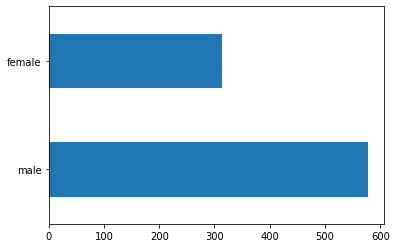

In [51]:
# fast visualization of Sex

df.Sex.value_counts().plot.barh();

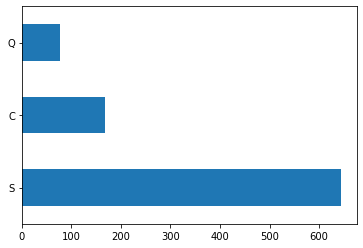

In [52]:
# fast visualization of Embarked

df.Embarked.value_counts().plot.barh();

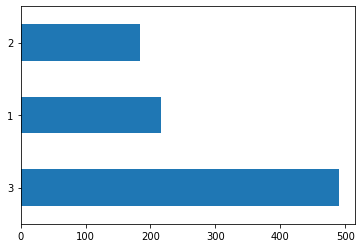

In [64]:
# fast visualization of Pclass

df.Pclass.value_counts().plot.barh();

In [57]:
# Convert type of Pclass into ordinal 

from pandas.api.types import CategoricalDtype

df.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: category
Categories (3, int64): [1, 2, 3]

In [61]:
# create categories for ordinal variables
Pclass_categories=[3,2,1]

In [62]:
# change type of Pcclass variable
df.Pclass=df.Pclass.astype(CategoricalDtype(categories=Pclass_categories,ordered = True))

In [63]:
df.Pclass.head(1)

0    3
Name: Pclass, dtype: category
Categories (3, int64): [3 < 2 < 1]

# Investigate Missing Value

In [29]:
# First, we fast handle with missing value, not for detailed only visualization

In [31]:
# Null values

# is there any null values ?

df.isnull().values.any()

True

In [32]:
# null numbers

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# Fast solution

## we drop Cabin variable

df.drop("Cabin",axis=1,inplace=True)

## replace null values with 0

# df["Age"].fillna(0,inplace=True)

## replace null values with median

# df["Age"].fillna(df.Age.median(),inplace=True)

## for all variables

df.fillna(df.median(),inplace=True)

##  handle with null values of categoric variable, use mode

df.Embarked.fillna(df.Embarked.mode(),inplace=True)



In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(2), object(2)
memory usage: 94.5+ KB


# Bar Plot

In [55]:
# It is used for visualization of categorical variables

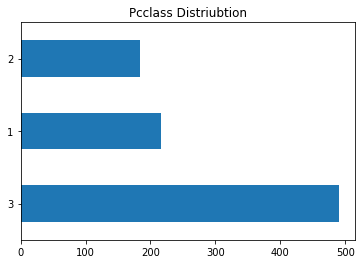

In [67]:
(df["Pclass"]
 .value_counts().
 plot.barh().
 set_title("Pcclass Distriubtion"));

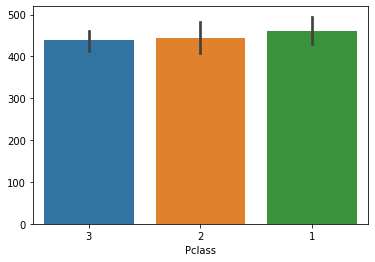

In [68]:
sns.barplot(x="Pclass",y=df.Pclass.index,data=df);

# Cross Vizualization

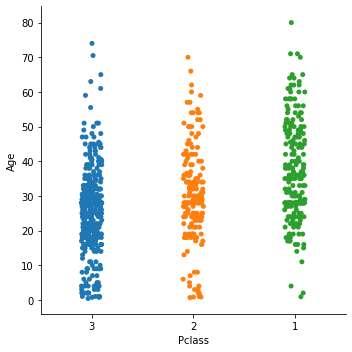

In [69]:
sns.catplot(x="Pclass",y="Age",data=df);

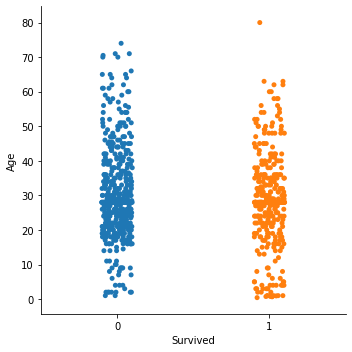

In [70]:
sns.catplot(x="Survived",y="Age",data=df);

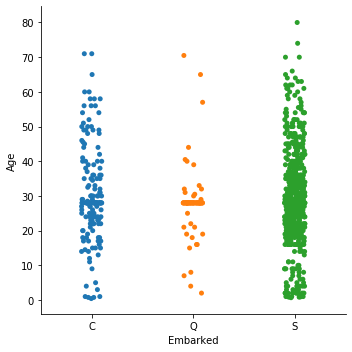

In [71]:
sns.catplot(x="Embarked",y="Age",data=df);

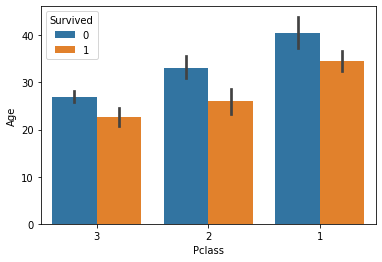

In [74]:
# Seaborn represents the original data when we add 3 dimension. Attention; there are people who have older than 40.
# Sticks on the bar reflect the standart deviation

sns.barplot(x="Pclass",y="Age",hue="Survived",data=df);

In [77]:
# we can reach the value of above graphic by using group by below. Hue argument makes a representation process for dataset. 
df.groupby(["Pclass","Survived"])["Age"].mean()

Pclass  Survived
3       0           26.951613
        1           22.747227
2       0           33.144330
        1           25.998046
1       0           40.556250
        1           34.609706
Name: Age, dtype: float64

# Histogram and Density

In [78]:
# It is used for distribution of numeric variables

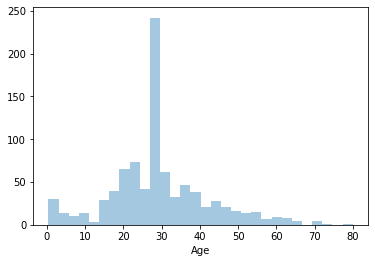

In [79]:
sns.distplot(df.Age, kde=False); # kde --> density argument

In [81]:
?sns.distplot

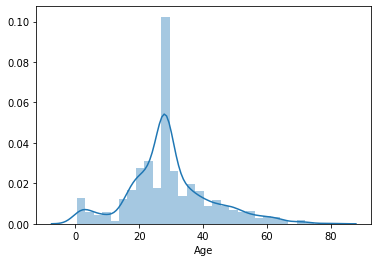

In [91]:
sns.distplot(df.Age);

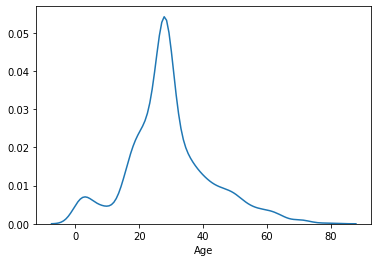

In [92]:
sns.distplot(df.Age, hist=False);

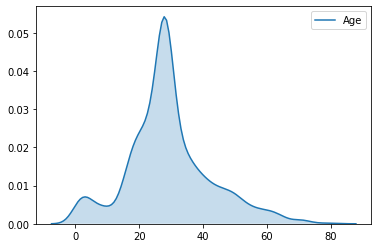

In [93]:
sns.kdeplot(df.Age,shade=True);

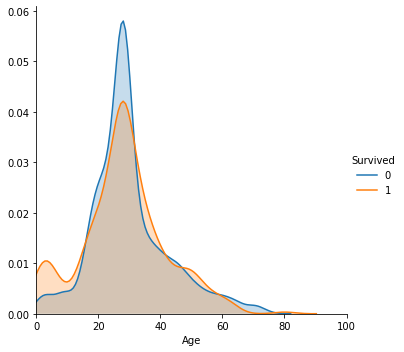

In [102]:
# Age distribution by survival result with density mapping
(sns
 .FacetGrid(df,
              hue="Survived",
              height = 5,
              xlim=(0,100))
 .map(sns.kdeplot,"Age",shade=True)
 .add_legend()
);

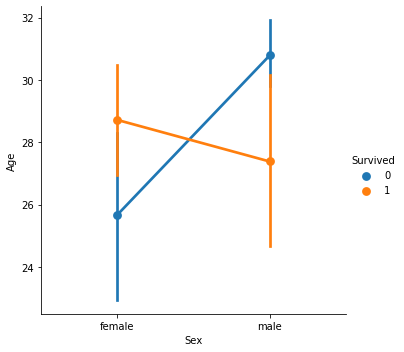

In [104]:
sns.catplot(x="Sex",y="Age",hue="Survived",kind="point",data=df);

# Boxplot

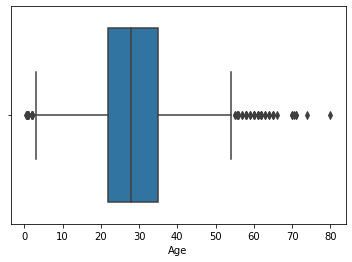

In [105]:
sns.boxplot(x=df["Age"]);

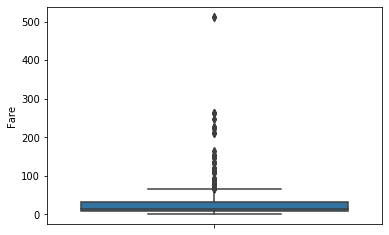

In [108]:
sns.boxplot(x=df["Fare"],orient="v");

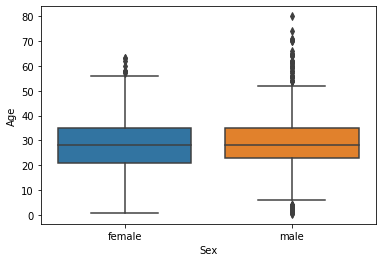

In [109]:
sns.boxplot(x=df["Sex"],y=df["Age"],data=df);

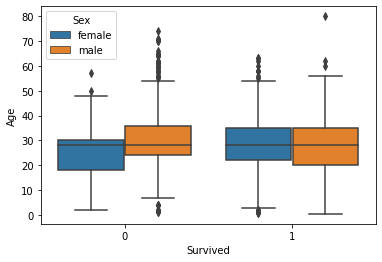

In [111]:
sns.boxplot(x=df["Survived"],y=df["Age"],hue=df["Sex"],data=df);

# Violin Plot

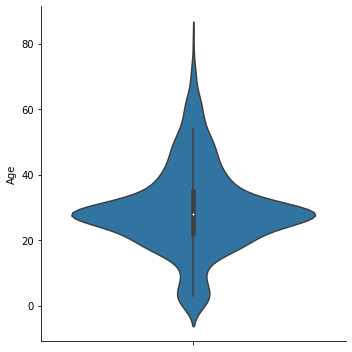

In [131]:
sns.catplot(y="Age",kind="violin",data=df);

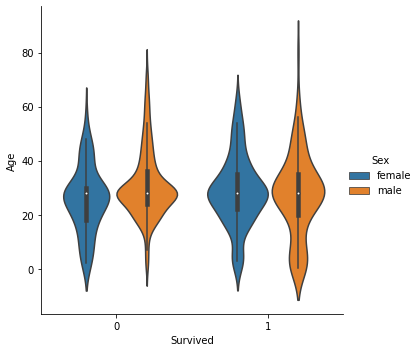

In [130]:
sns.catplot(x="Survived",y="Age",kind="violin", hue="Sex",data=df);

# Correlation Graphs

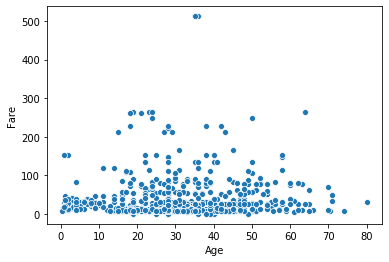

In [117]:
sns.scatterplot(x=df["Age"],y=df["Fare"],data=df);

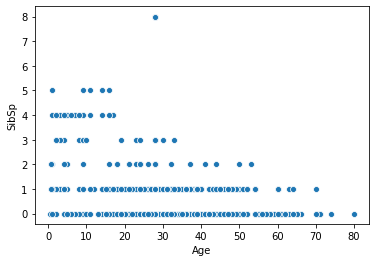

In [118]:
sns.scatterplot(x=df["Age"],y=df["SibSp"],data=df);

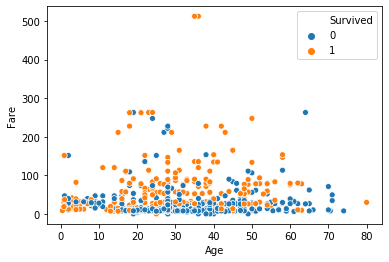

In [119]:
sns.scatterplot(x=df["Age"],y=df["Fare"],hue="Survived",data=df);

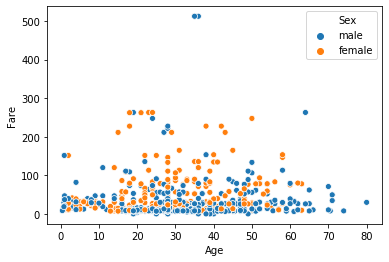

In [120]:
sns.scatterplot(x=df["Age"],y=df["Fare"],hue="Sex",data=df);

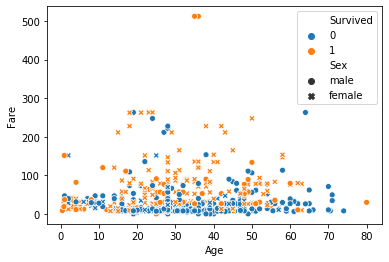

In [121]:
sns.scatterplot(x=df["Age"],y=df["Fare"],hue="Survived",style="Sex",data=df);

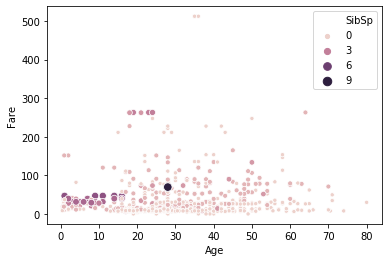

In [125]:
sns.scatterplot(x=df["Age"],y=df["Fare"],hue="SibSp",size="SibSp",data=df);

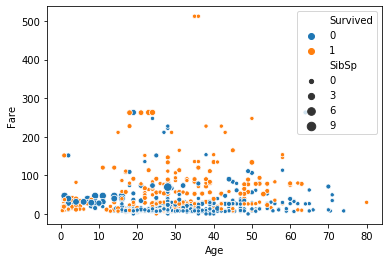

In [126]:
sns.scatterplot(x=df["Age"],y=df["Fare"],hue="Survived",size="SibSp",data=df);

# Demonstration of Linearity

In [127]:
import matplotlib.pyplot as plt

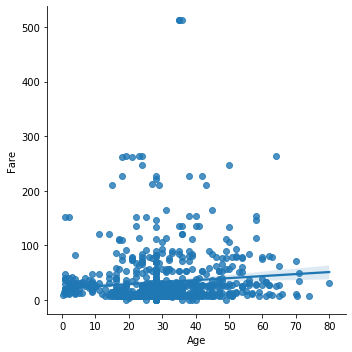

In [129]:
sns.lmplot(x="Age",y="Fare",data=df);

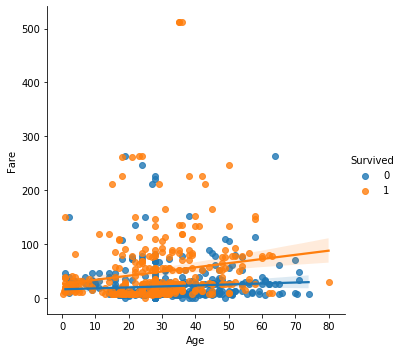

In [132]:
sns.lmplot(x="Age",y="Fare",hue="Survived",data=df);

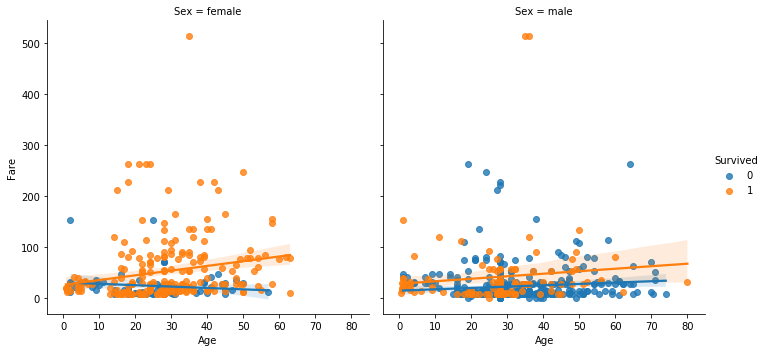

In [133]:
sns.lmplot(x="Age",y="Fare",hue="Survived",col="Sex",data=df);

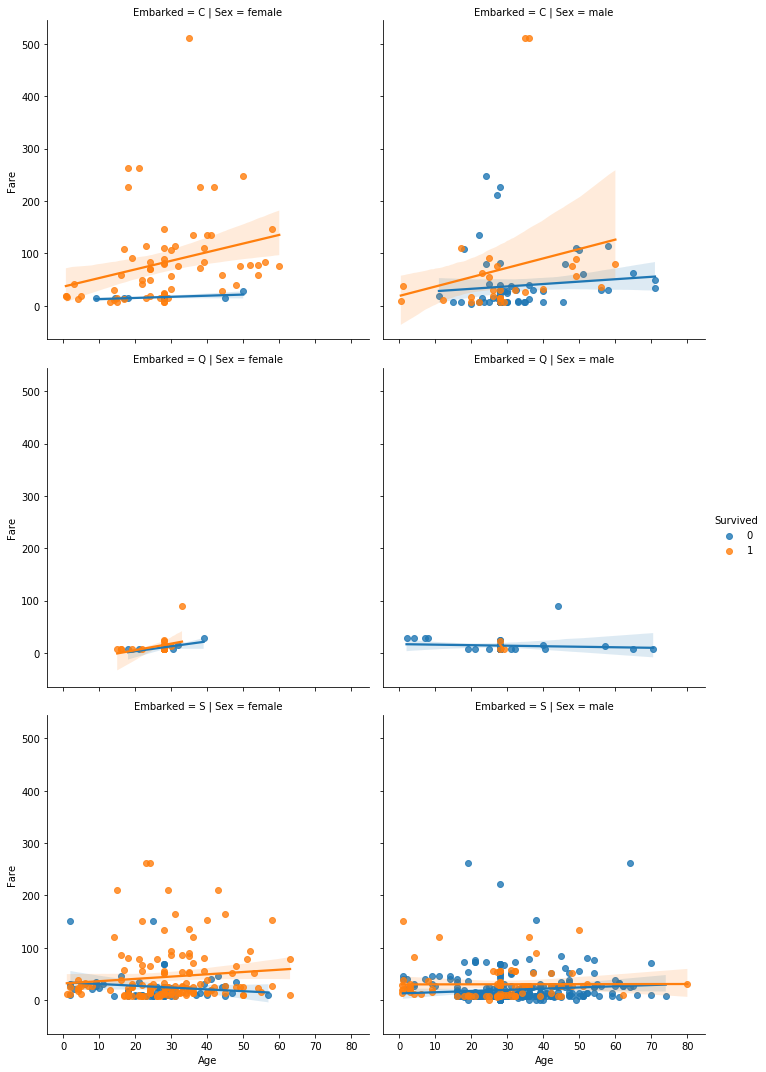

In [134]:
sns.lmplot(x="Age",y="Fare",hue="Survived",col="Sex",row="Embarked",data=df);

# Scatterplot Matrix

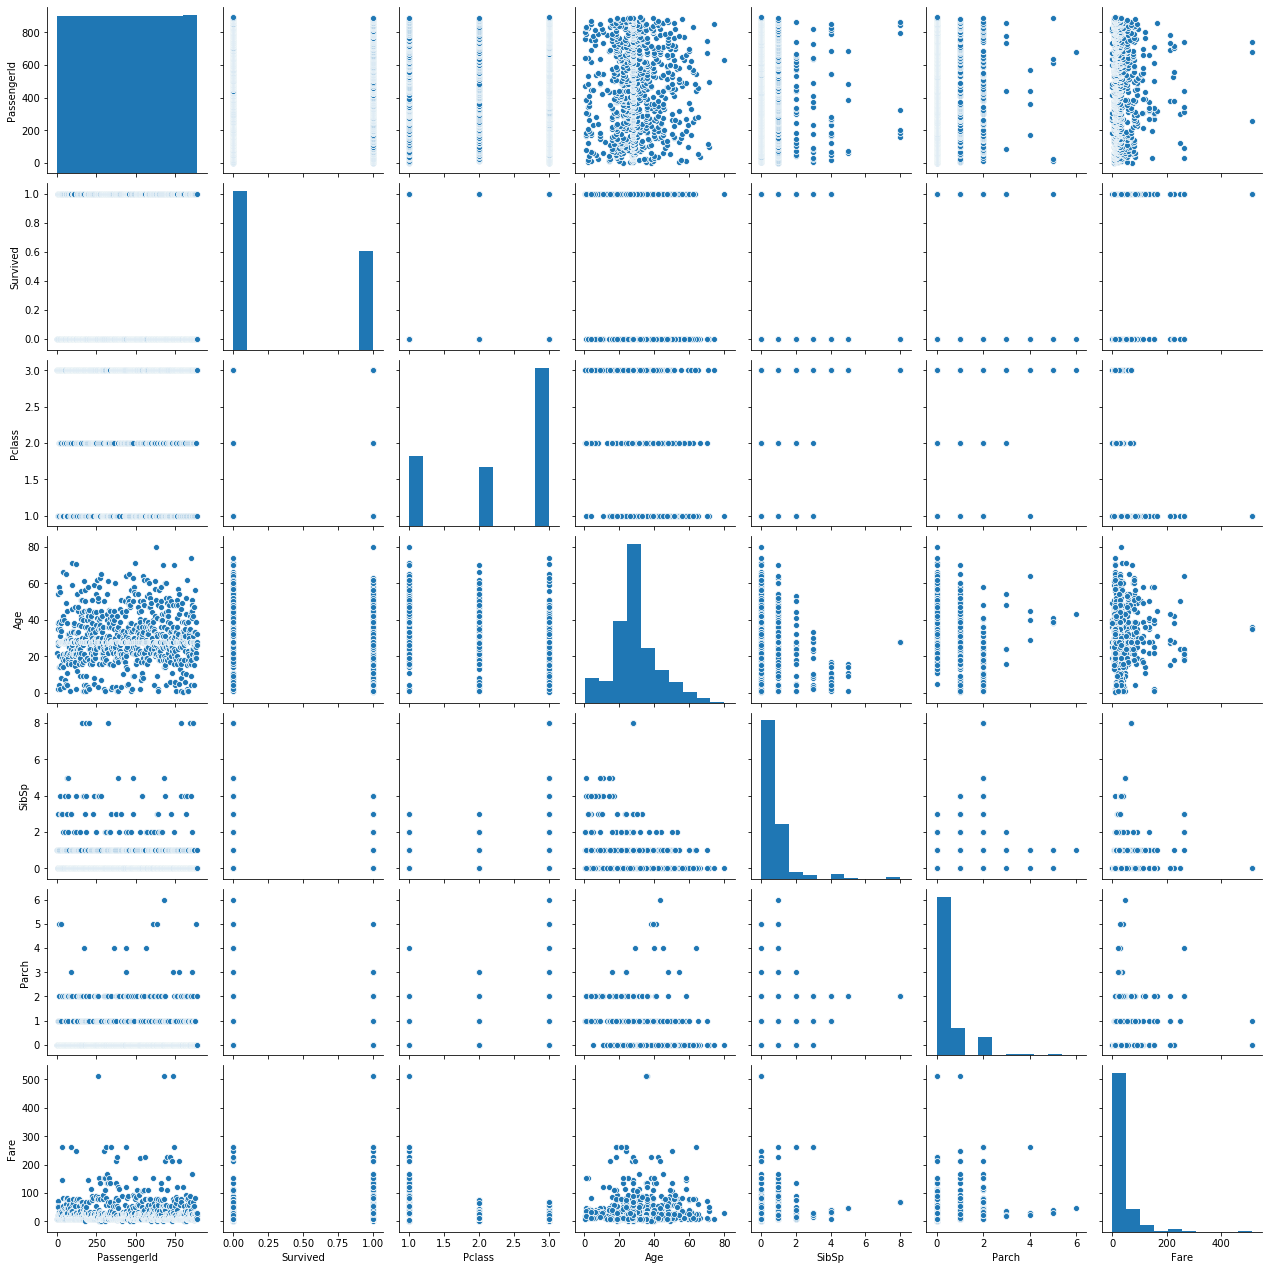

In [135]:
sns.pairplot(df);

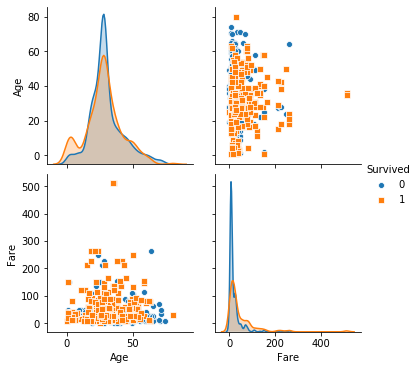

In [150]:
sns.pairplot(df[["Age","Fare","Survived"]],hue="Survived",markers=["o","s"]);

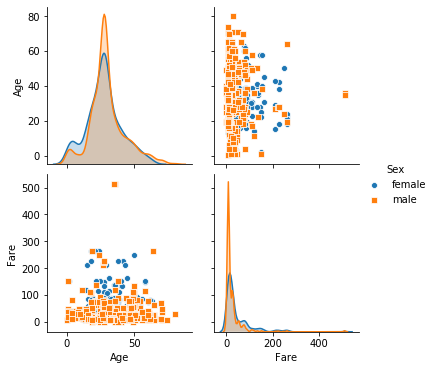

In [147]:
sns.pairplot(df[["Age","Fare","Sex"]],hue="Sex",markers=["o","s"]);

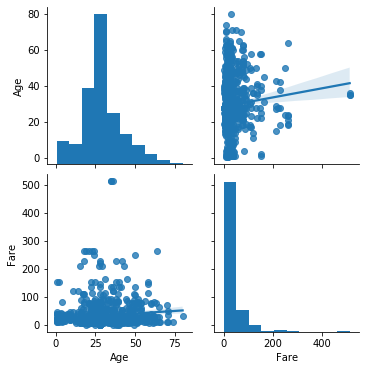

In [141]:
sns.pairplot(df[["Age","Fare"]],kind="reg");

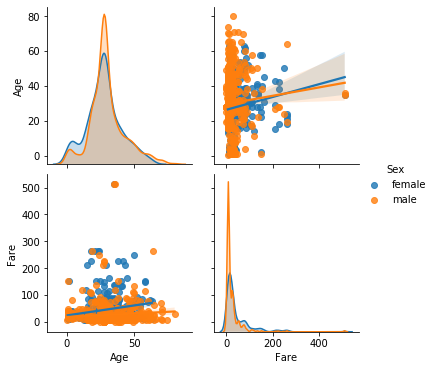

In [146]:
sns.pairplot(df[["Age","Fare","Sex"]],kind="reg",hue="Sex");

# Heat Map

In [157]:
# we cannot use heat map on titanic dataset. You can use seaborn fligths dataset as an example.

# first, you should make pivot table ---> df.pivot("","","")
# then  you should write heatmap functiopn ---> sns.heatmap(df);
# then fill the cells ---> sns.heatmap(df,annot=True,fmt="d");
# then  ---> sns.heatmap(df,annot=True,fmt="d"linewidths=.5);
# alternative --->sns.heatmap(df,annot=True,fmt="d"linewidths=.5, cbar=False);

# Line Graph

In [ ]:
# we cannot use line graph on titanic dataset. You can use seaborn fmri dataset as an example.
# sns.lineplot(x="",y="",data=df);
# sns.lineplot(x="",y="",hue="",data=df);
# sns.lineplot(x="",y="",hue="",style="",data=df);
# sns.lineplot(x="",y="",hue="",style="",markers=True, dashes=False, data=df);

# Time Series

In [159]:
!pip install pandas_datareader
import pandas_datareader as pr

In [160]:
df=pr.get_data_yahoo("AAPL", start="2016-01-01", end="2019-12-31")

In [161]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.323219
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.713696
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.249626
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.268383
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.386133


In [163]:
df.shape

(1006, 6)

In [164]:
close=df["Close"]

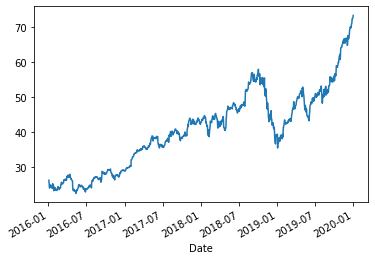

In [165]:
close.plot();

In [167]:
# if x series vaariable type is not datetype, you should convert it.
close.index = pd.DatetimeIndex(close.index)